In [1]:
from janus.models import MultiModalityCausalLM, VLChatProcessor


vl_chat_processor = VLChatProcessor.from_pretrained("deepseek-ai/Janus-Pro-7B")
tokenizer = vl_chat_processor.tokenizer

tokenizer

Python version is above 3.10, patching the collections module.


/root/work/Janus/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/work/Janus/env/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFa

LlamaTokenizerFast(name_or_path='deepseek-ai/Janus-Pro-7B', vocab_size=100000, model_max_length=16384, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<｜▁pad▁｜>', 'additional_special_tokens': ['<image_placeholder>', '<patch_placeholder>', '<|ref|>', '<|/ref|>', '<|det|>', '<|/det|>', '<|grounding|>', '<|User|>', '<|Assistant|>']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	100000: AddedToken("<｜begin▁of▁sentence｜>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	100001: AddedToken("<｜end▁of▁sentence｜>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	100002: AddedToken("ø", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	100003: AddedToken("ö", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	100004: AddedToken("ú", rstrip=Fals

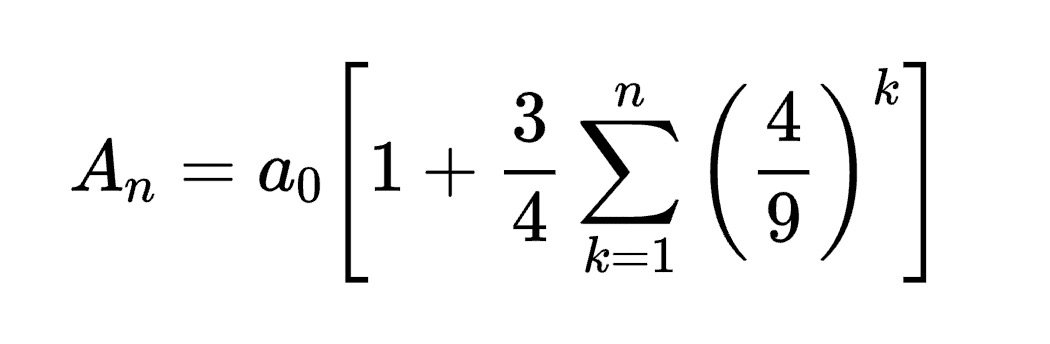

In [2]:
import PIL.Image


img = PIL.Image.open("images/equation.png")
img

In [4]:
import torch


conversation = [
	{
		"role": "<|User|>",
		"content": f"<image_placeholder>\nExplain this image.",
		#"images": [image],
	},
	{"role": "<|Assistant|>", "content": ""},
]

prepare_inputs = vl_chat_processor(conversations=conversation, images=[img], force_batchify=True).to('cuda', dtype=torch.bfloat16)
prepare_inputs

BatchedVLChatProcessorOutput(sft_format=['You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.\n\n<|User|>: <image_placeholder>\nExplain this image.\n\n<|Assistant|>:'], input_ids=tensor([[100000,   2054,    418,    245,   9394,   4706,    285,  10046,  20308,
             13,   1257,    418,   2249,    276,   2579,    254,   7959,   3093,
            344,    254,   2677,   4614,     11,    285,   4750,    254,   2677,
            366,    245,   6265,    280,   9224,   1244,   3892,   4706,     13,
            185,    185, 100601,     25,    207, 100016, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 10059

In [5]:
prepare_inputs.input_ids.shape

torch.Size([1, 628])

In [6]:
prepare_inputs.pixel_values.shape

torch.Size([1, 1, 3, 384, 384])

In [7]:
prepare_inputs.images_seq_mask.shape

torch.Size([1, 628])

In [8]:
prepare_inputs.images_emb_mask.shape, prepare_inputs.images_emb_mask.dtype, prepare_inputs.images_emb_mask.sum()

(torch.Size([1, 1, 576]), torch.bool, tensor(576, device='cuda:0'))

In [9]:
from transformers import AutoConfig, AutoModelForCausalLM


config = AutoConfig.from_pretrained("deepseek-ai/Janus-Pro-7B")
language_config = config.language_config

vl_gpt = AutoModelForCausalLM.from_pretrained("deepseek-ai/Janus-Pro-7B", language_config=language_config, trust_remote_code=True)
vl_gpt.to(torch.bfloat16).cuda()


inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)
inputs_embeds.shape

Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


input_ids=tensor([[100000,   2054,    418,    245,   9394,   4706,    285,  10046,  20308,
             13,   1257,    418,   2249,    276,   2579,    254,   7959,   3093,
            344,    254,   2677,   4614,     11,    285,   4750,    254,   2677,
            366,    245,   6265,    280,   9224,   1244,   3892,   4706,     13,
            185,    185, 100601,     25,    207, 100016, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594, 100594,
         100594, 1

torch.Size([1, 628, 4096])

In [10]:
prepare_inputs.attention_mask.shape

torch.Size([1, 628])

In [11]:
outputs = vl_gpt.language_model.generate(
    inputs_embeds=inputs_embeds,
    attention_mask=prepare_inputs.attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=512,
    do_sample=False,
    use_cache=True,
    top_p=1,
)

outputs

tensor([[   549,   3324,   3535,    245,  23668,   5761,    327,    245,   6905,
          12837,    338,     62,     77,    357,    633,    429,   5761,    317,
           4218,    372,     25,    185,    185,   6844,    338,     62,     77,
            403,    245,     62,     15,    357,   1354,     58,    207,     16,
            919,    357,   1122,     90,     18,   1061,     19,     92,    357,
           1805,    566,     74,     28,     16,   2056,     77,     92,    357,
           1354,      7,    357,   1122,     90,     19,   1061,     24,     92,
            357,   1035,   5317,     74,    357,   1035,     60,  20137,    185,
            185,   4898,      6,     82,    245,  30087,    280,    254,   6170,
             25,    185,    185,     16,     13,  12837,    338,     62,     77,
            357,   1780,   1002,    317,    254,   6905,   1435,   4218,     13,
            185,     17,     13,  12837,    245,     62,     15,    357,   1780,
           1002,    317,    

In [12]:
answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
print(answer)

The image shows a mathematical expression for a sequence \( A_n \). The expression is defined as:

\[ A_n = a_0 \left[ 1 + \frac{3}{4} \sum_{k=1}^{n} \left( \frac{4}{9} \right)^k \right] \]

Here's a breakdown of the components:

1. \( A_n \): This is the sequence being defined.
2. \( a_0 \): This is the initial term of the sequence.
3. The summation is from \( k=1 \) to \( n \), meaning it sums up terms from the first to the \( n \)th term.
4. Inside the summation, each term is \( \left( \frac{4}{9} \right)^k \), where \( k \) ranges from 1 to \( n \).
5. The expression \( \frac{3}{4} \) is added to the first term of the summation.

This expression represents a sequence where each term is a combination of the first \( n \) terms of a geometric series with the first term \( \frac{4}{9} \) and common ratio \( \frac{4}{9} \). The initial term \( a_0 \) is added to the result of the summation.


---
## image process

In [11]:
pixels = vl_chat_processor.image_processor([img], return_tensors="pt").pixel_values
pixels.shape, pixels.dtype

(torch.Size([1, 3, 384, 384]), torch.float32)

In [13]:
from transformers import AutoConfig, AutoModelForCausalLM


config = AutoConfig.from_pretrained("deepseek-ai/Janus-Pro-7B")
language_config = config.language_config

vl_gpt = AutoModelForCausalLM.from_pretrained("deepseek-ai/Janus-Pro-7B", language_config=language_config, trust_remote_code=True)
vl_gpt

Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


MultiModalityCausalLM(
  (vision_model): CLIPVisionTower(
    (vision_tower): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Identity()
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in

In [14]:
x = vl_gpt.vision_model(pixels)
x.shape

torch.Size([1, 576, 1024])

In [15]:
x = vl_gpt.aligner(x)
x.shape

torch.Size([1, 576, 4096])